# TED talks views prediction 

### Идея

Първоначалната ми идея беше да направя модел, който предсказва брой гледания на youtube клипове, но още от пръв поглед върху kernel-ите на dataset-a за trending youtube videos, ставаше ясно, че почти всички видеа са музикални клипове и трейлъри на филми. Тоест доста специфична извадка от всички youtube клипове. За това прецених, че [този](https://www.kaggle.com/rounakbanik/ted-talks) dataset за **TED talks** е представителна извадка и би бил по-добър за основа на модел.

Целта ми е да:
* разгледам данните
* да открия кои feature-и допринасят най-много за броя гледания на TED talks
* да натренирам регресионен модел с възможно най-висок процент успеваемост в отговарянето на въпроса: **Колко гледания би имал евентуален TED talk?**


Нека първо import-нем библиотеки, които ще ни трябват и заредим данните.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
import sklearn

from IPython.display import display

%matplotlib inline

In [2]:
data = pd.read_csv('data/ted-talks/ted_main.csv')

In [3]:
data.shape

(2550, 17)

Окей, имаме *2550* talk-a и *17* feature-а. Нека ги разгледаме по-подробно и видим какво представлява всеки от тях.

In [84]:
data.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

Според описанието в kaggle:

* **comments** - The number of first level comments made on the talk
* **description** - A blurb of what the talk is about
* **duration** - The duration of the talk in seconds
* **event** - The TED/TEDx event where the talk took place
* **film_date** - The Unix timestamp of the filming
* **languages** - The number of languages in which the talk is available
* **main_speaker** - The first named speaker of the talk
* **name** - The official name of the TED Talk. Includes the title and the speaker.
* **num_speaker** - The number of speakers in the talk
* **published_date** - The Unix timestamp for the publication of the talk on TED.com
* **ratings** - A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* **related_talks** - A list of dictionaries of recommended talks to watch next
* **speaker_occupation** - The occupation of the main speaker
* **tags** - The themes associated with the talk
* **title** - The title of the talk
* **url** - The URL of the talk
* **views** - The number of views on the talk

In [4]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


За начало можем да видим кои са talk-овете с **най-много гледания**.

In [5]:
most_viewd_talks = data[['title', 'main_speaker', 'views', 'comments']].sort_values('views', ascending=False)[:10]
most_viewd_talks

,title,main_speaker,views,comments
0,Do schools kill creativity?,Ken Robinson,47227110,4553
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
677,How great leaders inspire action,Simon Sinek,34309432,1930
837,The power of vulnerability,Brené Brown,31168150,1927
452,10 things you didn't know about orgasm,Mary Roach,22270883,354
1776,How to speak so that people want to listen,Julian Treasure,21594632,297
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
5,Why we do what we do,Tony Robbins,20685401,672
2114,This is what happens when you reply to spam email,James Veitch,20475972,150
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,846


* Виждаме, че най-популярият talk е **Do Schools Kill Creativity?** на *Ken Robinson* с цели 47 милиона гледания, което е над 2 пъти повече от например 5тия по ред. 
* Само 2 talk-a надвишават 40 милиона и съответно само 2 са между 30 и 40 милиона. 
* Също така можем да забележим, че въпреки че **Your body language may shape who you are** на *Amy Cuddy* също има над 40 милиона гледания, има 2 пъти по-малко коментари от Do Schools Kill Creativity?. 
* 6-тия talk по гледания **How to speak so that people want to listen** иронично има едва близо 300 коментара (очевидно хората са слушали толкова, че не са коментирали), което е над 100 пъти по-малко от другите talk-ове около него.

Можем да направим 2 извода - има доста малко на брой клипове с много висок брой гледания и броят гледания не винаги отговаря на количеството коментари. Нека видим как можем да приложим тези наблюдения върху dataset-a ни.

### Брой гледания

Можем да определим колоната **views** за label на нашия модел. Това е непрекъсната стойност, тоест с регресия ще се опитаме да предвидим нейната стойност. Нека видим какво разпределение имат данните.

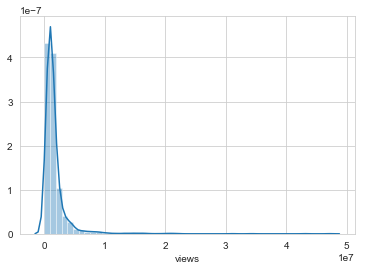

In [86]:
sns.distplot(data.views);

Както разбрахме вече, има малко на брой клипове с много гледания. Графиката също показва, че данните ни са далеч от нормалното разпределение. Нека все пак разгледаме рейнджа на гледанията.

In [115]:
data['views'].min()

50443

In [116]:
data['views'].max()

47227110

Клипът с най-малко гледания има *50 443*, а този с най-много *47 227 110*. Нека видим колко броя клипове имат гледания в рейнджове от 0 до 50 000 000 през 50 000.

In [114]:
data['views'].groupby(pd.cut(data['views'], np.arange(0, 50000000, 500000))).count()

views
(0, 500000]             277
(500000, 1000000]       768
(1000000, 1500000]      698
(1500000, 2000000]      303
(2000000, 2500000]      156
(2500000, 3000000]       82
(3000000, 3500000]       55
(3500000, 4000000]       38
(4000000, 4500000]       34
(4500000, 5000000]       34
(5000000, 5500000]        9
(5500000, 6000000]        7
(6000000, 6500000]       10
(6500000, 7000000]        6
(7000000, 7500000]        9
(7500000, 8000000]        5
(8000000, 8500000]        6
(8500000, 9000000]        6
(9000000, 9500000]        5
(9500000, 10000000]       2
(10000000, 10500000]      3
(10500000, 11000000]      3
(11000000, 11500000]      1
(11500000, 12000000]      0
(12000000, 12500000]      2
(12500000, 13000000]      0
(13000000, 13500000]      3
(13500000, 14000000]      1
(14000000, 14500000]      0
(14500000, 15000000]      3
                       ... 
(34500000, 35000000]      0
(35000000, 35500000]      0
(35500000, 36000000]      0
(36000000, 36500000]      0
(36500000, 370

Прецених, че тъй като имаме само няколко клипове с над 5 милиона гледания, бих могла да ги считам за outlier-и и да ги премахна от dataset-a. 

In [89]:
#data = data[data.views < 5000000]

Това обаче резултира в намаляване на score-a на baseline модела по-надолу в notebook-a.

Може би клиповете с много милиони гледания, *макар и много малко на брой, носят ценна информация* за модела и за това реших, че не трябва да ги махам, а да пробвам друг подход за нормализиране на данните. Като например да ги прекарам през логаритъм.

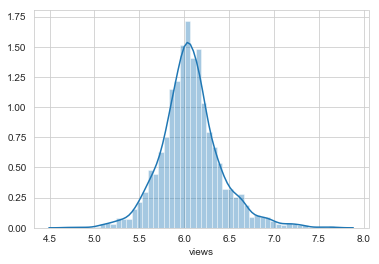

In [87]:
sns.distplot(pd.np.log10(data.views));

Така дистрибуцията е значително по-стандартна. 

## Брой коментари

Въпреки че е логично клиповете с най-много гледания да имат най-много коментари, както и обратното, видяхме че не винаги е така. Нека видим връзката между 2те колони.

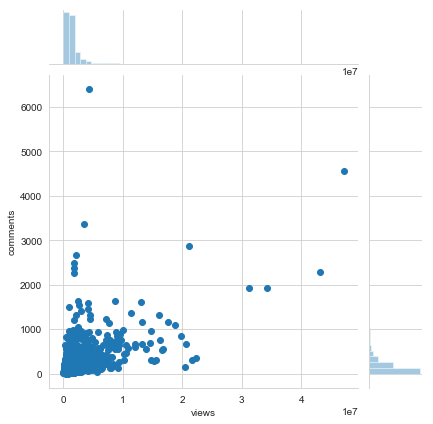

In [162]:
sns.jointplot(x='views', y='comments', data=data);

In [163]:
data[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530897
comments,0.530897,1.000000


Очевидно гледанията и коментарите имат корелация, но какво още можем да извлечем от тази колона? Можем да видим до колко клиповете са станали обект на *дискусия*. Ще направим нова колона, която ще съдържа **съотношението между броя коментари и гледания** - discussion_rate.

In [6]:
data['discussion_rate'] = data['comments']/data['views']

Нека видим кои talk-ове са **най-дискутирани**.

In [7]:
most_discussed_talks = data[['title', 'main_speaker', 'views','comments', 'discussion_rate']].sort_values('discussion_rate', ascending=False)[:10]
most_discussed_talks

,title,main_speaker,views,comments,discussion_rate
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220
803,E-voting without fraud,David Bismark,543551,834,0.001534
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236
661,The danger of science denial,Michael Specter,1838628,2272,0.001236
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235


Неизненадващо най-обсъжданата тема е **The case for same-sex marriage**, като заедно с *Militant atheism*, *On reading the Koran* и *The danger of science denial* предполагам засягат религиозна нотка и съответно създават предпоставки за дебати.

## Дати

Друго наблюдение е че в dataset-a има 2 колони, които представляват дати - **film_date** и **published_date**. Може да ги конвертираме от UNIX формат до нещо по-разбирамо и human readable.

In [8]:
import datetime

data['film_date'] = data['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
data['published_date'] = data['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

data[['film_date','published_date']].head()

,film_date,published_date
0,25-02-2006,27-06-2006
1,25-02-2006,27-06-2006
2,24-02-2006,27-06-2006
3,26-02-2006,27-06-2006
4,22-02-2006,27-06-2006


За мен има логика по-отдавна качените клипове да имат повече гледания. За това нека преобразуваме string колоните в няколко числови такива - *film_year*, *film_month*, *film_day* и *published_year*, *published_month*, *published_day*.

In [9]:
data['film_year'] = data['film_date'].str[6:].astype(np.int64)
data['film_month'] = data['film_date'].str[3:].str[:2].astype(np.int64)
data['film_day'] = data['film_date'].str[:2].astype(np.int64)
data['published_year'] = data['published_date'].str[6:].astype(np.int64)
data['published_month'] = data['published_date'].str[3:].str[:2].astype(np.int64)
data['published_day'] = data['published_date'].str[:2].astype(np.int64)

data[['film_date','film_day', 'film_month', 'film_year', 
      'published_date', 'published_day', 'published_month','published_year']].head()

,film_date,film_day,film_month,film_year,published_date,published_day,published_month,published_year
0,25-02-2006,25,2,2006,27-06-2006,27,6,2006
1,25-02-2006,25,2,2006,27-06-2006,27,6,2006
2,24-02-2006,24,2,2006,27-06-2006,27,6,2006
3,26-02-2006,26,2,2006,27-06-2006,27,6,2006
4,22-02-2006,22,2,2006,27-06-2006,27,6,2006


## Ненужни колони

Също така може да забележим, че **name** колоната = **main_speaker** + **title**, тоест не носи допълнителна информация и за това просто ще я махна.

In [10]:
data[['name', 'main_speaker','title']].head()

,name,main_speaker,title
0,Ken Robinson: Do schools kill creativity?,Ken Robinson,Do schools kill creativity?
1,Al Gore: Averting the climate crisis,Al Gore,Averting the climate crisis
2,David Pogue: Simplicity sells,David Pogue,Simplicity sells
3,Majora Carter: Greening the ghetto,Majora Carter,Greening the ghetto
4,Hans Rosling: The best stats you've ever seen,Hans Rosling,The best stats you've ever seen


In [11]:
data = data.drop(['name'], axis=1)

## Null values

Нека проверим дали има *null* стойности някъде в dataset-a.

In [94]:
data.isnull().sum().sort_values()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
num_speaker           0
published_date        0
ratings               0
related_talks         0
tags                  0
title                 0
views                 0
speaker_occupation    6
dtype: int64

Според резултата имаме null стойности само в една колона и само на 6 места. Имаме 2550 наблюдения, така че спокойно можем да махнем тези редове без да се притесняваме, че ще изгубим голяма част от ценните си данни.

In [12]:
data = data.dropna()
data.shape

(2544, 23)

## Брой говорители

In [98]:
data['num_speaker'].value_counts()

1    2486
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

Виждаме, че 2486 от останалите 2544 talk-a са проведени от 1 човек и общо 58 са били с повече от 1 говорител. Можем да  преобразуваме тази колона да съдържа информация единствено дали talk-a е проведен от 1 или повече говорители.

In [99]:
#data['single_speaker'] = (data.num_speaker == 1).astype(np.int64)
#data = data.drop('num_speaker', axis=1)

Това също доведе до намаляне на резултата на baseline модела, макар и с доста малко. Следователно броят на говорителите все пак носи информация на модела, за това няма да махам колоната.

## Ratings

Колоната **ratings** представлява *json* обект, съдържащ рейтинга на talk-a според определени категории.

In [101]:
data['ratings'].head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

Обектите трябва да се преобразуват.

In [13]:
data['ratings'] = data['ratings'].str.replace("'",'"')
pd.read_json(data['ratings'].iloc[1])[['name','count']]

,name,count
0,Funny,544
1,Courageous,139
2,Confusing,62
3,Beautiful,58
4,Unconvincing,258
5,Longwinded,113
6,Informative,443
7,Inspiring,413
8,Fascinating,132
9,Ingenious,56


Можем да видим, че всеки talk е оценен спрямо следните 14 категории - **Funny, Courageous, Confusing, Beautiful, Unconvincing, Longwinded,	Informative, Inspiring, Fascinating, Ingenious, Persuasive, Jaw-dropping, Obnoxious, OK**.

От тях можем да определим като позитивни следните 9 - **Funny, Courageous, Beautiful, Informative, Inspiring, Fascinating, Ingenious, Persuasive, Jaw-dropping**, като негативни тези 4 - **Confusing, Unconvincing, Longwinded, Obnoxious**, и като неутрална само 1 - **OK**.

Имаме няколко варианта:
1. Може да добавим 1 колона, която държи само дали има повече позитивни рейтинги от негативните.
2. Можем да направим 3 колони, в които да държим процента на позитивни, негативни и неутрални рейтинги спрямо броя на всички.
3. Може да добавим 14 колони, в които да държим процента на всяка една от категориите на рейтингите.

За момента като среден вариант бих избрала №2.


In [14]:
import warnings
warnings.filterwarnings("ignore")  

# създаване на новите колони
data['positive_rating_percent'] = 0.0
data['negative_rating_percent'] = 0.0
data['neutral_rating_percent'] = 0.0

positive_types = ['Funny', 'Beautiful', 'Courageous', 'Informative', 'Inspiring', 'Fascinating', 'Ingenious', 'Persuasive', 'Jaw-dropping']
negative_types = ['Confusing', 'Unconvincing', 'Longwinded', 'Obnoxious']

for i in range(2543):
    row = pd.read_json(data['ratings'].iloc[i])
    ratings_count = row['count'].sum() # намиране на броя на всички рейтинги
    
    positive_count = 0
    for rating_type in positive_types:
        positive_count += row[row['name'] == rating_type]['count'].item() # намиране на броя на всички позитивни рейтинги
    
    # намиране на процента на всички позитивни рейтинги
    positive_percent = positive_count * 100 / ratings_count
    
    negative_count = 0
    for rating_type in negative_types:
        negative_count += row[row['name'] == rating_type]['count'].item() # намиране на броя на всички негативни рейтинги

    # намиране на процента на всички негативни рейтинги
    negative_percent = negative_count * 100 / ratings_count
        
    ok_count = row[row['name'] == 'OK']['count'].item() # намиране на броя на всички неутрални рейтинги
    
    # намиране на процента на всички неутрални рейтинги
    neutral_percent = ok_count * 100 / ratings_count
    
    data['positive_rating_percent'][i] = positive_percent
    data['negative_rating_percent'][i] = negative_percent
    data['neutral_rating_percent'][i] = neutral_percent
    
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,...,discussion_rate,film_year,film_month,film_day,published_year,published_month,published_day,positive_rating_percent,negative_rating_percent,neutral_rating_percent
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,1,27-06-2006,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...",...,0.000096,2006,2,25,2006,6,27,97.536494,1.212573,1.250932
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,1,27-06-2006,"[{""id"": 7, ""name"": ""Funny"", ""count"": 544}, {""i...",...,0.000083,2006,2,25,2006,6,27,73.876022,19.209809,6.914169
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,1,27-06-2006,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...",...,0.000076,2006,2,24,2006,6,27,82.400850,12.429178,5.169972
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,1,27-06-2006,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 760}...",...,0.000118,2006,2,26,2006,6,27,93.535408,4.184549,2.280043
4,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,1,27-06-2006,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 3202}...",...,0.000049,2006,2,22,2006,6,27,97.822014,1.209992,0.967994


Възможно е някой клип да няма някой тип рейтинг все още(например ако е качен скоро). За това може би е по-удачно на клиповете с под 100 рейтинга да сложим средното и за 3те вида.

In [16]:
for i in range(2543):
    row = pd.read_json(data['ratings'].iloc[i])
    ratings_count = row['count'].sum()
    if(ratings_count < 100):
        data['positive_rating_percent'][i] = data['positive_rating_percent'].mean()
        data['negative_rating_percent'][i] =  data['negative_rating_percent'].mean()
        data['neutral_rating_percent'][i] = data['neutral_rating_percent'].mean()

Нека видим каква е корелациятя между видовете *рейтинги* и *броя гледания*.

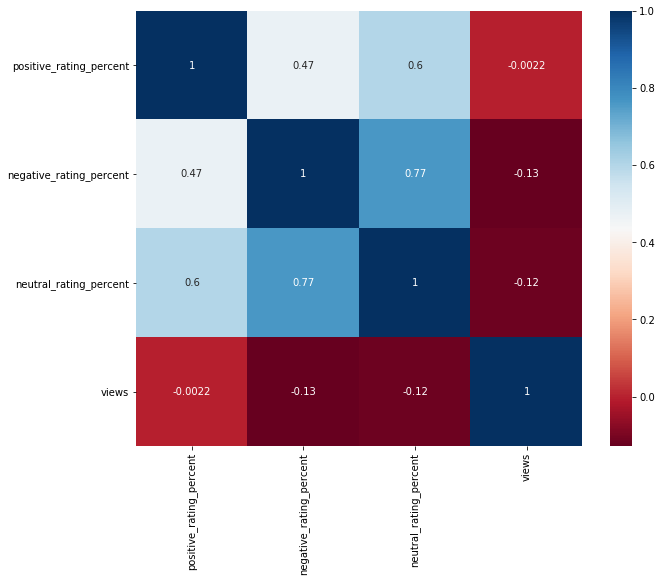

In [17]:
ratings = ['positive_rating_percent','negative_rating_percent','neutral_rating_percent', 'views']

plt.figure(figsize=(10,8))
sns.heatmap(data[ratings].corr(), annot=True, cmap='RdBu');

Хммм.. оказва се, че и трите вида рейтинги имат отрицателна корелация спрямо гледанията. Неутралните и негативните гледания имат доста висока корелация, тоест може би преценката ми, че **OK** е неутрален рейтинг е грешна и трябва да слея колоните.

In [18]:
data['negative_rating_percent'] = data['negative_rating_percent'] + data['neutral_rating_percent']
data = data.drop('neutral_rating_percent', axis = 1)

## Baseline model

Нека видим какъв модел бихме могли да направим на оснoвата на числовите ни данни до момента и дали горе долу можем да го използваме за отправна точка. Така наречения *baseline* модел.

In [19]:
data.describe()

,comments,duration,languages,num_speaker,views,discussion_rate,film_year,film_month,film_day,published_year,published_month,published_day,positive_rating_percent,negative_rating_percent
count,2544.000000,2544.000000,2544.000000,2544.000000,2.544000e+03,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000
mean,191.706761,827.316431,27.319969,1.028302,1.699779e+06,0.000147,2011.463443,5.657233,14.417453,2012.090409,6.310535,15.430818,37.378588,12.267823
std,282.613719,373.828955,9.563529,0.207945,2.501043e+06,0.000160,3.731375,3.396646,8.930295,3.013876,3.366152,8.638678,43.086269,10.281737
min,2.000000,135.000000,0.000000,1.000000,5.044300e+04,0.000003,1972.000000,1.000000,1.000000,2006.000000,1.000000,1.000000,0.000000,0.000000
25%,63.000000,578.750000,23.000000,1.000000,7.565802e+05,0.000055,2009.000000,3.000000,6.000000,2010.000000,3.000000,8.000000,0.000000,5.110347
50%,118.000000,848.500000,28.000000,1.000000,1.123870e+06,0.000103,2012.000000,5.000000,14.000000,2012.000000,6.000000,15.000000,0.000000,9.115379
75%,222.000000,1047.000000,33.000000,1.000000,1.702149e+06,0.000177,2014.000000,9.000000,23.000000,2015.000000,9.000000,23.000000,87.092594,16.187371
max,6404.000000,5256.000000,72.000000,5.000000,4.722711e+07,0.002220,2017.000000,12.000000,31.000000,2017.000000,12.000000,31.000000,98.995892,81.106113


За момнета в тренирането на модел не бихме вкючили броя на коментари, защото това е нещо, което не бихме могли да знаем за един клип, преди той да бъде качен.

In [50]:
numeric_column_names = ['duration', 'languages', 'num_speaker', 'discussion_rate', 'film_year', 'film_month', 'film_day',
       'published_year', 'published_month', 'published_day', 'positive_rating_percent', 'negative_rating_percent']

In [51]:
from sklearn.model_selection import train_test_split

train_no_views = data[numeric_column_names]
train_views = data['views']

x_train, x_test, y_train, y_test = train_test_split(train_no_views, 
                                                    train_views, 
                                                    test_size=0.3, 
                                                    random_state=4330)

In [52]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Колко ли добър резултат имаме? Нека проверим.

In [53]:
print(regressor.score(x_train, y_train))
print(regressor.score(x_test, y_test))

0.1935752705907816
0.2073261196723506


Честно казано очаквах малко по-голямо число. Явно моделът доста underfit-ва. Нека приложим трансформацията с логаритъм и видим дали би имало подобрение.

In [54]:
all_data_lr = LinearRegression().fit(x_train, pd.np.log10(y_train))
print(all_data_lr.score(x_train, pd.np.log10(y_train)))
print(all_data_lr.score(x_test, pd.np.log10(y_test)))

0.488052484109774
0.43915522998710027


Добре, все още доста нисък скор, но има подобрение. Нека видим на кои колони моделът ни придава най-голяма важност.

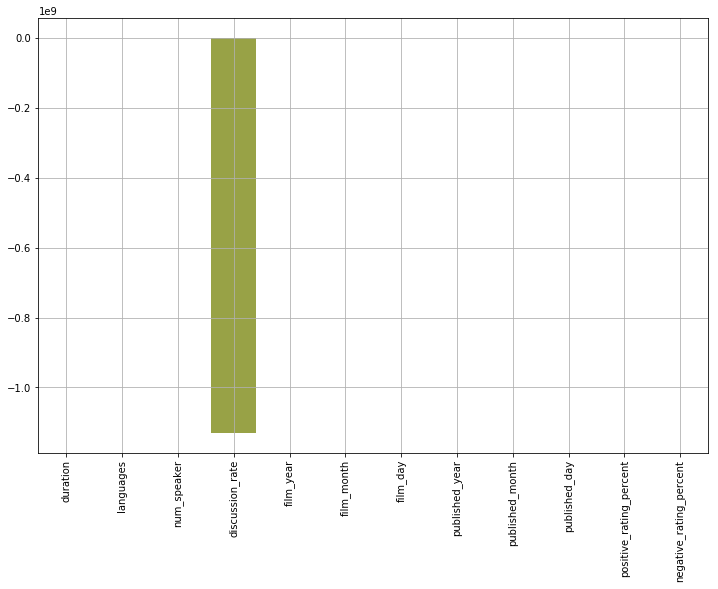

In [55]:
plt.figure(figsize=(12,8))
barplot = sns.barplot(x=numeric_column_names, y=regressor.coef_, orient='vertical')
plt.setp(barplot.get_xticklabels(), rotation=90); plt.grid(True);

Моделът ни за сега, придава важност единствено на колоната *discussion_rate*.

Можем да се опитаме да променим съотношението на train/test данните от 70/30 на 90/10. Така може би моделът ще научи повече.

In [56]:
x_train, x_test, y_train, y_test = train_test_split(train_no_views, train_views, test_size=0.1, random_state=4330)

new_data_lr = LinearRegression().fit(x_train, pd.np.log10(y_train))
print(new_data_lr.score(x_train, pd.np.log10(y_train)))
print(new_data_lr.score(x_test, pd.np.log10(y_test)))

0.4713600093025242
0.5055367492527758


Нека видим съотношението между нашите предикшъни и реалните стойности на views.

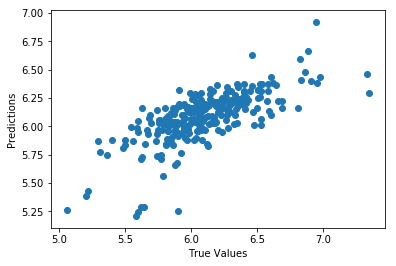

In [42]:
predictions = new_data_lr.predict(x_test[numeric_column_names])
plt.scatter(pd.np.log10(y_test), predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions');

## Свързани клипове

Според описанието тази колона съдържа всички клипове, към които текущия е включен в списъка на препоръчани клипове. Логично е с колкото повече клипове е свързан, толкова повече гледания да има.

In [116]:
print(data['related_talks'].iloc[0])

[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': "How to escape education's death valley", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speak

Опитвайки се обаче да парсна колоната от json обекти, прибягвайки до онлайн json validator, най-накрая разбрах, че **в тази колона има невалидни json обекти** (в  title полето има двойни кавички вместо единични). За това след дълго чудене реших поне да проверя колко на брой свързани клипове има всеки клип. Използвам не много елегантния начин да преброя колко пътисе среща символа '{', който обозначава началото на нов обект.

In [110]:
for i in range(2543):
    count = data['related_talks'].iloc[i].count('{')
    data['related_talks_count'] = count
    
data['related_talks_count'].value_counts()

6    2544
Name: related_talks_count, dtype: int64

Очудващо всички клипове имат по точно 6 свързани клипа. Тоест тази колона **не ни носи абсолютно никаква информация** и не ни е от полза.

## Брой езици и дължина на клипа

Колоните languages и duration имат непрекъснати стойности, но въпреки това моделът за сега не им придава никаква важност. Нека разгледаме тяхната дистрибуция.

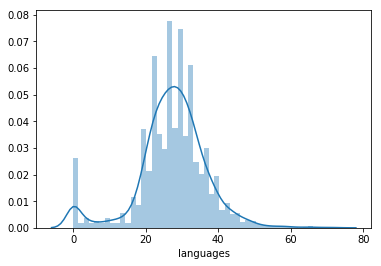

In [58]:
sns.distplot(data.languages);

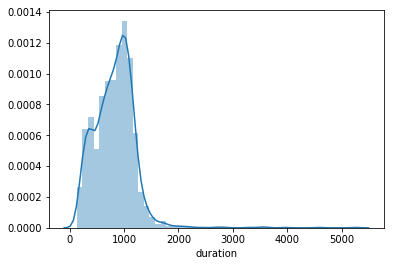

In [59]:
sns.distplot(data.duration);

И в двата случая имаме неравномерно разпределение. Подход, който можем да приложим върху данните е **binning**. Тоест можем да ги разделим на интервали и да ги категоризираме по този начин. Нека видим информация за самите стойности.

In [60]:
data['languages'].describe()

count    2544.000000
mean       27.319969
std         9.563529
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [61]:
data['duration'].describe()

count    2544.000000
mean      827.316431
std       373.828955
min       135.000000
25%       578.750000
50%       848.500000
75%      1047.000000
max      5256.000000
Name: duration, dtype: float64

Езиците са между 0 и 72, тоест можем да ги разпределим в 5 интервала по 15, а продължителността - между 135 и 5256, тук интервалите може да са 18 по 300(понеже времето е в секунди, ще разделим клиповете в интервали през 5 минути).

In [99]:
languages_bins = [index for index in range(0, 80, 15)]
languages_labels = [index for index in range(1,6)]
data['languages_binned'] = pd.cut(data['languages'], bins=languages_bins, labels=languages_labels)

duration_bins = [index for index in range(0, 5301, 300)]
duration_labels = [index for index in range(1,18)]
data['duration_binned'] = pd.cut(data['duration'], bins=duration_bins, labels=duration_labels)

In [100]:
data[['languages', 'languages_binned', 'duration', 'duration_binned']].head()

,languages,languages_binned,duration,duration_binned
0,60,4,1164,4
1,43,3,977,4
2,26,2,1286,5
3,35,3,1116,4
4,48,4,1190,4


## Втори опит

Нека енкоднем новите данни и да пробваме пак.

In [126]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def encode_categorical(col):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(data[col])

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    
    return pd.DataFrame(onehot_encoded)

In [142]:
frames = [data[numeric_column_names], 
          encode_categorical('languages_binned'), 
          encode_categorical('duration_binned')]
train_no_views = pd.np.concatenate(frames, axis = 1)
train_views = data['views']

x_train, x_test, y_train, y_test = train_test_split(train_no_views, train_views, test_size=0.1, random_state=4330)

new_data_lr = LinearRegression().fit(x_train, pd.np.log10(y_train))
print(new_data_lr.score(x_train, pd.np.log10(y_train)))
print(new_data_lr.score(x_test, pd.np.log10(y_test)))

0.5949194438137901
0.5491198192210932


Eдна идея се вдигна.

## Говорители

Нека разгледаме и говорителите. Кой говорител е направил най-много talk-ове?

In [223]:
data['main_speaker'].value_counts()

Hans Rosling                  9
Juan Enriquez                 7
Rives                         6
                             ..
Catherine Crump               1
Nikolai Begg                  1
Jane Fonda and Lily Tomlin    1
Name: main_speaker, Length: 2156, dtype: int64

Има 2156 различни speaker-и, тоест едва ли колоната е подходяща за категоризация.